In [174]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
# tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VIE.PA CWST CWY.AX TOM.OL SYM GXO AUTO.OL ZBRA KGX.DE CGNX MANH BKW.SW ENEL.MI NEE IBE.MC ORSTED.CO FSLR ENR.DE')

In [176]:
# df = tickers.download(period="1y")
df = tickers.download(start="2017-01-01", end="2018-01-01", interval="1d")

[*********************100%***********************]  26 of 26 completed

6 Failed downloads:
['SYM', 'GFL', 'VLTO', 'GXO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2017-01-01 -> 2018-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1483246800, endDate = 1514782800")')
['ENR.DE', 'AUTO.OL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2017-01-01 -> 2018-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1483225200, endDate = 1514761200")')


In [177]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/ticker_download_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)

In [178]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2015-01-01', end = '2017-01-01')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...


$VLTO: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420088400, endDate = 1483246800")


Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...


$GFL: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420088400, endDate = 1483246800")


Processing CLH...
Processing VIE.PA...
Processing CWST...
Processing CWY.AX...
Processing TOM.OL...
Processing SYM...


$SYM: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420088400, endDate = 1483246800")


Processing GXO...


$GXO: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420088400, endDate = 1483246800")


Processing AUTO.OL...


$AUTO.OL: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420066800, endDate = 1483225200")


Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing MANH...
Processing BKW.SW...
Processing ENEL.MI...
Processing NEE...
Processing IBE.MC...
Processing ORSTED.CO...
Processing FSLR...
Processing ENR.DE...


$ENR.DE: possibly delisted; no price data found  (1d 2015-01-01 -> 2017-01-01) (Yahoo error = "Data doesn't exist for startDate = 1420066800, endDate = 1483225200")


In [179]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$66.74B,1.21M,15.1,N/A,15.103332
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.4B,0.16M,29.5,N/A,29.498076
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$22.23B,nanM,N/A,N/A,N/A
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$26.54B,1.23M,34.01,N/A,34.014276
4,GF.SW,GEORG FISCHER N,Georg Fischer AG engages in the provision of p...,$4.72B,0.29M,41.81,N/A,41.811778
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$92.29B,2.23M,44.89,N/A,44.894994
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$17.83B,nanM,N/A,N/A,N/A
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.86B,0.46M,14.81,N/A,14.813287
8,VIE.PA,VEOLIA ENVIRON.,Veolia Environnement SA designs and provides w...,$21.73B,2.36M,18.26,N/A,18.260509
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$7.29B,0.19M,201.21,N/A,201.213597


In [180]:
# We only need closing prices
df = df['Close']
df

# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)
df

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.627588,NaN,...,NaN,NaN,236.798630,NaN,41.233505,11.530846,NaN,NaN,NaN,NaN
2017-01-03,NaN,40.615574,34.205612,29.611034,55.750000,12.700000,1.057858,107.968613,2.593981,NaN,...,54.650002,24.204636,235.306564,NaN,40.662399,11.393322,NaN,60.779068,44.934475,86.250000
2017-01-04,NaN,40.656979,34.715458,30.228800,56.700001,12.790000,1.024007,108.654610,2.597715,NaN,...,55.230000,24.275993,228.899475,NaN,40.890842,11.354534,NaN,60.606674,45.604187,87.029999
2017-01-05,NaN,40.574177,34.530060,29.639109,56.200001,12.790000,1.007081,108.489975,2.601449,NaN,...,54.880001,24.261719,232.936844,NaN,40.776623,11.139433,NaN,60.839397,45.187881,84.750000
2017-01-06,NaN,40.574177,34.344654,29.606348,56.400002,12.710000,1.011313,108.773529,2.590247,NaN,...,53.869999,24.190367,233.463440,NaN,40.776623,11.026591,NaN,60.494640,44.871124,85.959999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,NaN,48.589645,44.651634,58.125603,53.799999,21.830000,1.373633,123.968277,3.425027,NaN,...,48.330002,32.387032,305.354218,NaN,59.035175,15.871490,NaN,75.722420,61.952045,105.150002
2017-12-26,NaN,NaN,44.651634,57.364864,52.840000,22.240000,NaN,123.718422,NaN,NaN,...,48.470001,32.273869,NaN,NaN,NaN,NaN,NaN,75.695953,61.878685,104.790001
2017-12-27,NaN,48.972916,45.120674,57.693577,53.200001,22.340000,1.329886,124.088593,3.395863,NaN,...,48.480000,32.544212,309.128448,NaN,59.735195,15.841943,NaN,75.898682,62.547913,104.949997


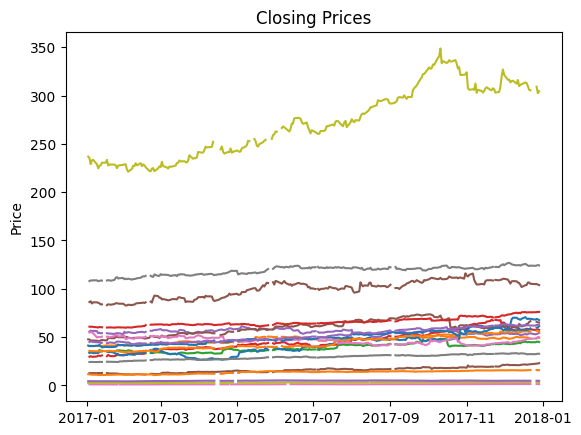

In [181]:
# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 0
Number of rows total: 258
Number of columns before dropping bad columns: 26
Number of columns after dropping bad columns: 20
Number of rows in dataframe without missing values after dropping bad columns: 237
Number of rows total after dropping bad columns: 258


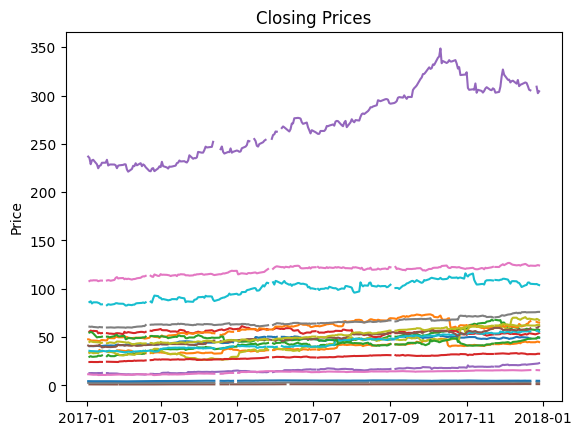

In [182]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

# Print number of columns before dropping columns with too many NaN values
print(f"Number of columns before dropping bad columns: {df.shape[1]}")

# Drop columns with more than 60% NaN values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Print number of columns after dropping columns with too many NaN values
print(f"Number of columns after dropping bad columns: {df.shape[1]}")

# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values after dropping bad columns: {df.dropna().shape[0]}")
print(f"Number of rows total after dropping bad columns: {df.shape[0]}")

# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 237
Number of rows total: 258


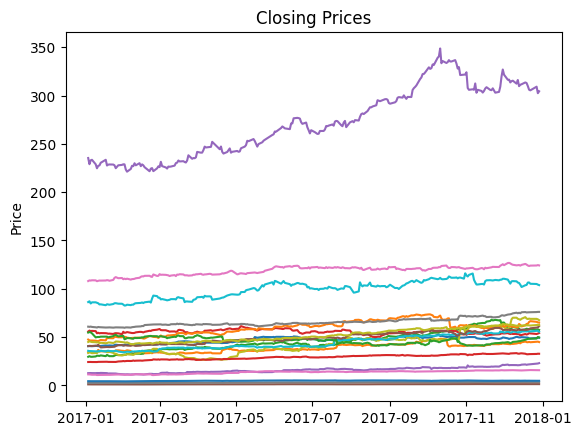

In [183]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

df = df.dropna()

# Plot closing prices
plt.plot(df)
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()


# Normalising (ignore)

In [184]:
df_normalized_closed = df - df.iloc[0]
df_normalized_closed

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.041405,0.509846,0.617765,0.950001,0.090000,-0.033851,0.685997,0.003734,0.629997,-0.231701,-0.035818,-0.847088,0.579998,0.071358,-6.407089,0.228443,-0.038788,-0.172394,0.669712,0.779999
2017-01-05,-0.041397,0.324448,0.028074,0.450001,0.090000,-0.050777,0.521362,0.007468,0.340000,-0.252758,-0.030792,-1.070000,0.230000,0.057083,-2.369720,0.114223,-0.253889,0.060329,0.253407,-1.500000
2017-01-06,-0.041397,0.139042,-0.004686,0.650002,0.010000,-0.046545,0.804916,-0.003734,-0.220001,-0.337017,-0.042282,-1.025421,-0.780003,-0.014269,-1.843124,0.114223,-0.366731,-0.284428,-0.063351,-0.290001
2017-01-09,0.207020,-0.370800,0.327602,0.389999,-0.020000,-0.042314,0.731743,-0.009958,0.029999,-0.547646,-0.025047,-1.194832,-4.980003,-0.075438,-6.494797,0.456882,-0.334995,-0.637787,-0.253395,-0.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,8.101830,10.821255,28.561535,-1.709999,9.020000,0.302651,15.574013,0.834285,35.570000,20.275425,0.499052,18.201256,-6.450001,8.169827,70.676651,17.439415,4.433844,14.837570,17.173424,20.279999
2017-12-22,7.974072,10.446022,28.514568,-1.950001,9.130000,0.315775,15.999664,0.831046,35.309998,20.060055,0.450412,19.040794,-6.320000,8.182396,70.047653,18.372776,4.478168,14.943352,17.017570,18.900002
2017-12-27,8.357342,10.915062,28.082542,-2.549999,9.640000,0.272028,16.119980,0.801882,35.299995,20.706181,0.445990,18.372780,-6.170002,8.339577,73.821884,19.072796,4.448621,15.119614,17.613438,18.699997


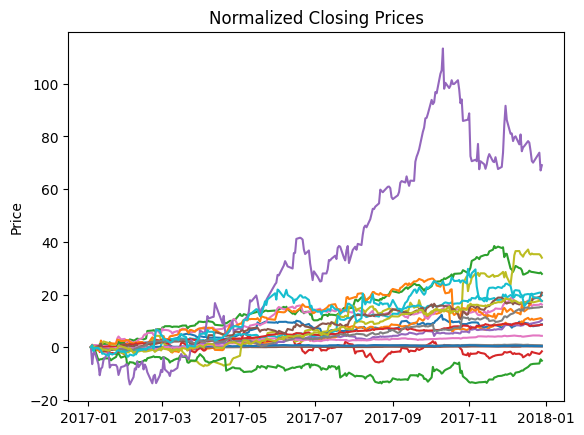

In [185]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [186]:
# Add a new column to the DataFrame with daily differences
df_diff = df.diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2017-01-04,0.041405,0.509846,0.617765,0.950001,0.090000,-0.033851,0.685997,0.003734,0.629997,-0.231701,-0.035818,-0.847088,0.579998,0.071358,-6.407089,0.228443,-0.038788,-0.172394,0.669712,0.779999
2017-01-05,-0.082802,-0.185398,-0.589691,-0.500000,0.000000,-0.016926,-0.164635,0.003734,-0.289997,-0.021057,0.005026,-0.222912,-0.349998,-0.014275,4.037369,-0.114220,-0.215101,0.232723,-0.416306,-2.279999
2017-01-06,0.000000,-0.185406,-0.032761,0.200001,-0.080000,0.004231,0.283554,-0.011202,-0.560001,-0.084259,-0.011490,0.044579,-1.010002,-0.071352,0.526596,0.000000,-0.112842,-0.344757,-0.316757,1.209999
2017-01-09,0.248417,-0.509842,0.332289,-0.260002,-0.030000,0.004231,-0.073174,-0.006223,0.250000,-0.210629,0.017235,-0.169411,-4.200001,-0.061169,-4.651672,0.342659,0.031735,-0.353359,-0.190044,0.010002
2017-01-10,0.082798,0.880646,0.814327,-2.220001,0.120000,-0.038083,-0.896385,-0.018671,-0.180000,-0.063190,-0.042370,-0.205086,0.340000,0.046894,-4.125122,-0.114220,-0.345571,-0.249939,-0.208160,-0.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,-0.723949,0.375233,-0.150261,0.970001,0.119999,-0.030623,-0.527451,0.009721,0.419998,0.086155,0.002948,1.967960,0.090000,0.176037,-3.774292,0.466686,0.114500,0.000000,-0.064175,0.150002
2017-12-22,-0.127758,-0.375233,-0.046967,-0.240002,0.110001,0.013124,0.425652,-0.003240,-0.260002,-0.215370,-0.048640,0.839539,0.130001,0.012569,-0.628998,0.933361,0.044324,0.105782,-0.155853,-1.379997
2017-12-27,0.383270,0.469040,-0.432026,-0.599998,0.510000,-0.043746,0.120316,-0.029164,-0.010002,0.646126,-0.004422,-0.668015,0.149998,0.157181,3.774231,0.700020,-0.029547,0.176262,0.595867,-0.200005


In [187]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df.pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2017-01-04,0.001019,0.014905,0.020863,0.017040,0.007087,-0.031999,0.006354,0.001440,0.018783,-0.006478,-0.008228,-0.017857,0.010613,0.002948,-0.027229,0.005618,-0.003404,-0.002836,0.014904,0.009043
2017-01-05,-0.002037,-0.005341,-0.019508,-0.008818,0.000000,-0.016529,-0.001515,0.001437,-0.008487,-0.000593,0.001164,-0.004785,-0.006337,-0.000588,0.017638,-0.002793,-0.018944,0.003840,-0.009129,-0.026198
2017-01-06,0.000000,-0.005369,-0.001105,0.003559,-0.006255,0.004202,0.002614,-0.004306,-0.016529,-0.002373,-0.002658,0.000961,-0.018404,-0.002941,0.002261,0.000000,-0.010130,-0.005667,-0.007010,0.014277
2017-01-09,0.006123,-0.014845,0.011224,-0.004610,-0.002360,0.004184,-0.000673,-0.002403,0.007503,-0.005945,0.003998,-0.003650,-0.077965,-0.002529,-0.019925,0.008403,0.002878,-0.005841,-0.004235,0.000116
2017-01-10,0.002028,0.026028,0.027200,-0.039544,0.009464,-0.037500,-0.008246,-0.007225,-0.005362,-0.001794,-0.009790,-0.004435,0.006845,0.001943,-0.018028,-0.002778,-0.031250,-0.004156,-0.004659,-0.006165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,-0.014643,0.008404,-0.002576,0.018278,0.005556,-0.022013,-0.004251,0.002843,0.006114,0.001540,0.000608,0.030909,0.001871,0.005467,-0.012185,0.008097,0.007287,0.000000,-0.001032,0.001410
2017-12-22,-0.002622,-0.008334,-0.000807,-0.004441,0.005064,0.009646,0.003445,-0.000945,-0.003762,-0.003843,-0.010024,0.012790,0.002697,0.000388,-0.002056,0.016064,0.002800,0.001399,-0.002509,-0.012954
2017-12-27,0.007888,0.010504,-0.007433,-0.011152,0.023362,-0.031847,0.000971,-0.008515,-0.000145,0.011574,-0.000921,-0.010049,0.003104,0.004853,0.012360,0.011858,-0.001862,0.002328,0.009618,-0.001902


# Rolling 60-day Volatility (ignore)

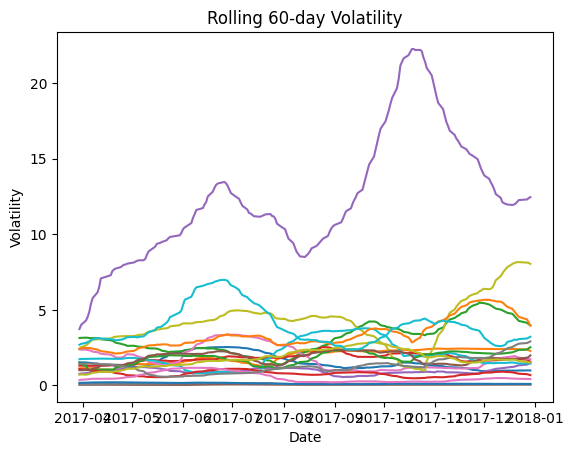

In [188]:
df_volatility = df.rolling(window=60).std()
df_volatility

# Plot volatility
plt.plot(df_volatility)
plt.title('Rolling 60-day Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

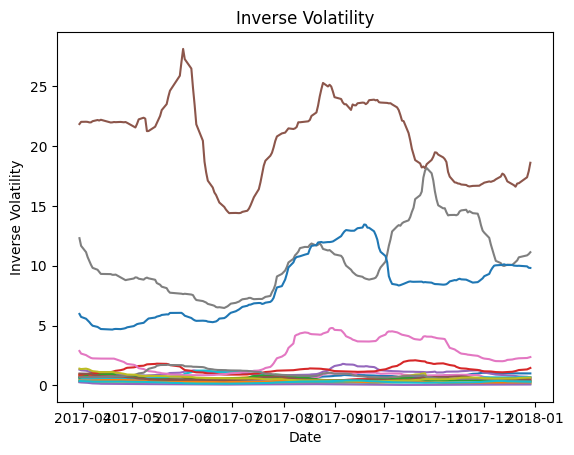

In [189]:
df_inverse_volatility = 1 / df_volatility
df_inverse_volatility

# Plot inverse volatility
plt.plot(df_inverse_volatility)
plt.title('Inverse Volatility')
plt.ylabel('Inverse Volatility')
plt.xlabel('Date')
plt.show()

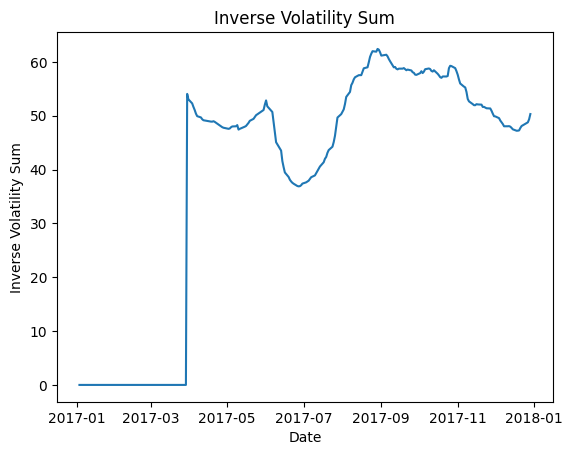

In [190]:
df_inverse_volatility_sum = df_inverse_volatility.sum(axis=1)
df_inverse_volatility_sum

# Plot inverse volatility sum
plt.plot(df_inverse_volatility_sum)
plt.title('Inverse Volatility Sum')
plt.ylabel('Inverse Volatility Sum')
plt.xlabel('Date')
plt.show()

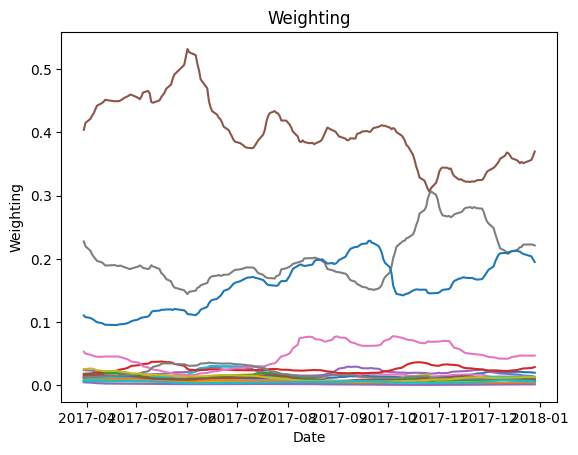

In [191]:
df_weighting = df_inverse_volatility.div(df_inverse_volatility_sum, axis=0)
df_weighting
# Plot weighting
plt.plot(df_weighting)
plt.title('Weighting')
plt.ylabel('Weighting')
plt.xlabel('Date')
plt.show()


In [192]:
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.021327,0.008714,0.004770,0.011928,0.016137,0.353311,0.011144,0.218822,0.002566,0.014264,0.209276,0.004479,0.009037,0.026095,0.001725,0.011960,0.047166,0.007717,0.012632,0.006927
2017-12-22,0.020987,0.008712,0.004871,0.012001,0.015605,0.351194,0.011313,0.222567,0.002548,0.014333,0.207880,0.004584,0.008831,0.026761,0.001695,0.011658,0.047190,0.007524,0.012964,0.006781
2017-12-27,0.020628,0.008628,0.004945,0.012012,0.014859,0.356431,0.011575,0.222729,0.002522,0.014070,0.203904,0.004692,0.008628,0.027466,0.001666,0.011178,0.047033,0.007297,0.013148,0.006591


In [193]:
# Drop rows before 2023-01-01
df_weighting = df_weighting.loc['2023-01-01':]
df_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,


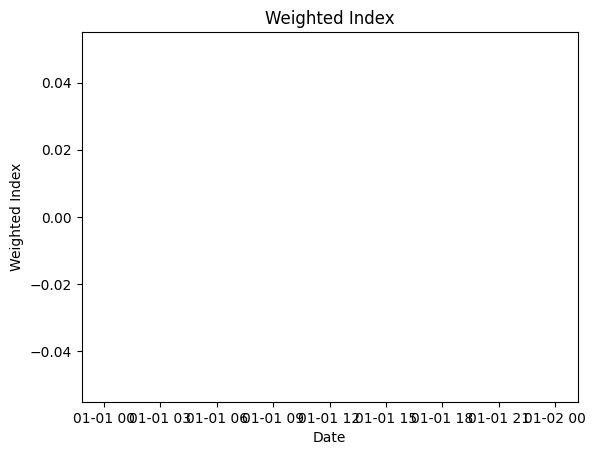

In [194]:
# Create a index with help of the closing prices and the weighting
df_weighted_index = (df.loc['2023-01-01':] * df_weighting).sum(axis=1)
df_weighted_index

# Plot weighted index
plt.plot(df_weighted_index)
plt.title('Weighted Index')
plt.ylabel('Weighted Index')
plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed


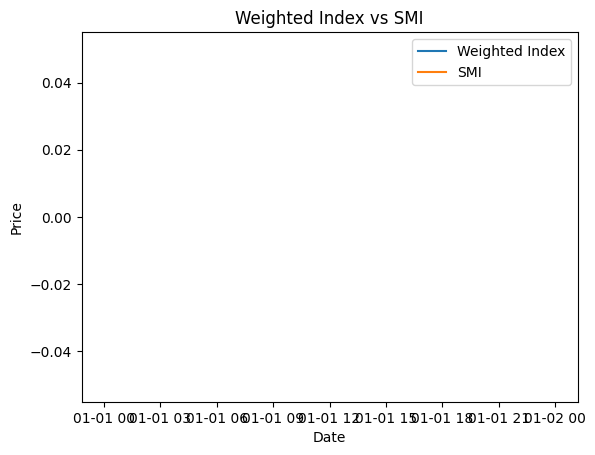

In [195]:
# Compare the weighted index with SMI
smi = yf.download('^SSMI', start='2023-01-01', end='2025-01-01', interval='1d')['Close']
smi = smi.reindex(df_weighted_index.index, method='ffill')
smi = smi.dropna()

# Plot weighted index and SMI
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()



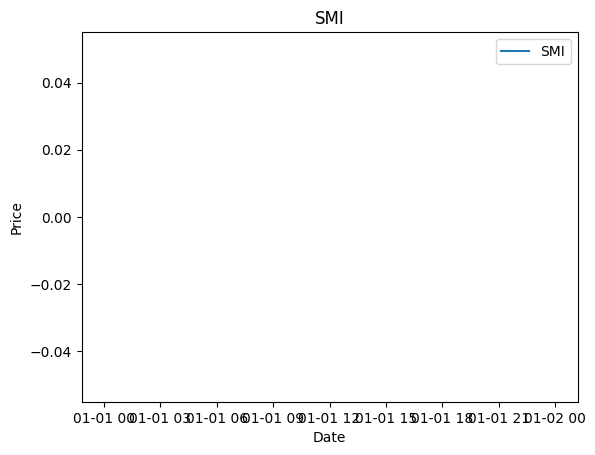

In [196]:
# Plot SMI 
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [197]:
smi = (smi / smi.iloc[0])  # Normalize to start at 0
df_weighted_index = (df_weighted_index / df_weighted_index.iloc[0])  # Normalize to start at 0
df_weighted_index

IndexError: single positional indexer is out-of-bounds

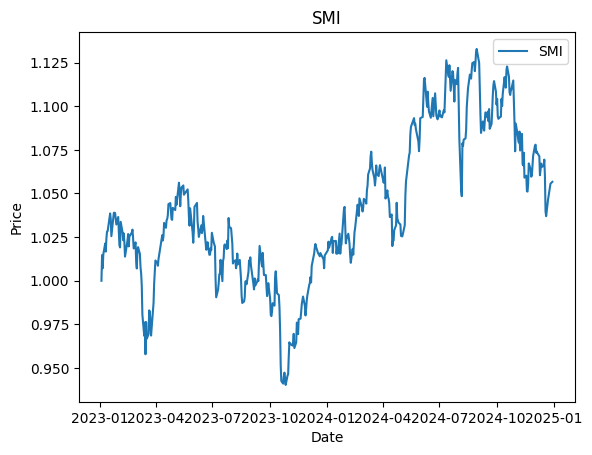

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

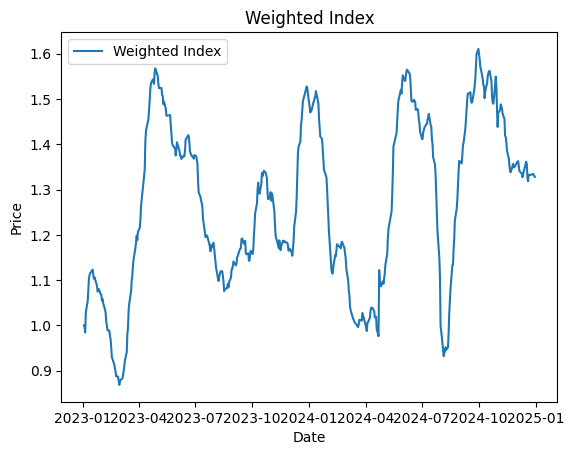

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

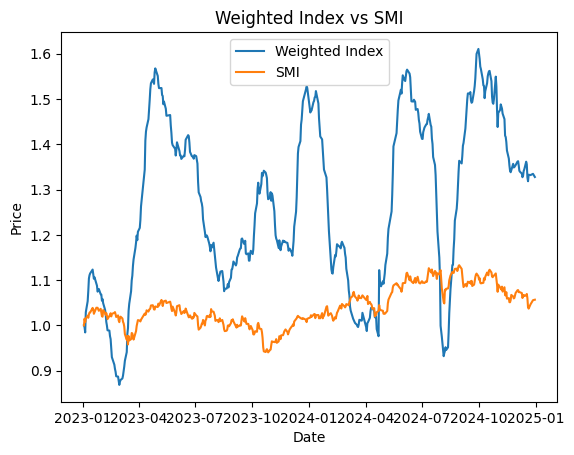

In [ ]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Fixed weighting

In [ ]:
# Split data into training and test sets
train_size = int(len(df) * 0.5)
df_train, df_test = df[:train_size], df[train_size:]
df_train


Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-09,35.605915,35.245090,20.858107,53.349998,7.590000,0.671267,109.500389,2.463249,50.450001,33.890545,4.161251,45.376820,67.220001,24.909454,226.441986,43.517906,14.443531,53.315655,41.637863,56.259998
2016-06-10,35.523106,34.420940,20.480062,52.540001,7.470000,0.662877,109.010841,2.379587,48.509998,33.490345,4.048969,44.489605,66.110001,24.879320,221.175903,43.289467,14.097959,53.315655,41.296112,56.020000
2016-06-14,35.274689,32.979816,19.551273,52.000000,7.510000,0.637703,108.194962,2.300706,47.889999,32.226566,3.880548,43.054031,65.599998,25.110371,218.893921,41.233498,13.586649,53.622162,41.053307,55.250000
2016-06-15,35.605915,32.772636,19.691288,51.860001,7.530000,0.637703,107.515068,2.336561,48.200001,32.563572,3.914779,43.116444,65.629997,24.881329,222.492416,42.261490,13.618387,53.468906,40.999348,55.919998
2016-06-16,35.564510,32.832481,19.574610,51.150002,7.640000,0.629313,108.167786,2.348512,48.389999,31.657862,3.909987,42.068741,65.139999,25.084249,220.122681,40.662395,13.597230,53.988270,40.801502,56.619999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-16,93.946968,61.768341,60.294056,58.060001,55.240002,2.122076,197.846359,5.631351,71.959999,44.789574,8.950525,69.987259,96.860001,62.784946,828.461609,181.299622,15.631645,108.700768,80.871399,254.149994
2020-09-17,92.467499,61.884411,59.819225,57.860001,56.330002,2.021025,197.541702,5.486385,64.000000,44.766228,8.874745,70.155724,95.449997,62.599091,820.649658,177.145508,15.623372,107.500740,81.478828,256.179993
2020-09-18,93.022301,62.774273,58.423214,55.939999,55.500000,2.002652,194.228760,5.516122,61.750000,45.139671,8.798964,70.268036,95.279999,62.016804,816.076660,179.007690,15.515855,107.230957,81.232056,256.149994


In [ ]:
df_test

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2020-09-23,91.912689,61.023571,57.549534,53.380001,52.160000,1.956719,185.832001,5.545857,62.020000,44.206066,8.697925,68.545959,93.879997,61.208328,838.369690,183.352768,15.201567,103.937866,78.232971,249.580002
2020-09-24,90.803078,61.710316,58.109825,53.180000,54.080002,1.965906,185.270340,5.478951,61.299999,44.089367,8.714765,67.684929,92.809998,62.155640,823.126587,180.965363,14.845924,103.537834,78.014664,250.669998
2020-09-25,90.710609,63.054779,58.546680,55.040001,55.139999,1.947533,186.622192,5.452932,63.049999,43.832626,8.744235,67.441582,94.279999,63.114174,838.369690,184.355484,15.164349,105.705322,78.830879,257.459991
2020-09-28,91.172951,64.080070,60.275063,56.130001,55.549999,1.919973,188.754684,5.536937,65.370003,44.579510,8.824224,69.238525,95.370003,63.633732,839.893982,191.326706,15.114724,106.086746,79.590164,260.559998
2020-09-29,90.433212,63.780220,61.690060,56.009998,56.070000,1.956719,187.974045,5.575594,65.760002,44.626190,8.866325,70.005974,95.300003,63.405296,845.610107,192.711395,15.151940,105.500694,79.504707,258.920013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,146.899994,218.102982,35.983059,233.600006,105.389999,2.640797,234.922195,6.596666,175.880005,67.599998,12.980000,31.020000,282.540009,69.199806,332.100006,142.000000,26.830000,204.770309,116.070038,385.369995
2024-12-20,147.399994,217.364182,35.683781,230.529999,105.970001,2.650687,237.675064,6.601516,182.389999,67.699997,13.050000,31.200001,280.260010,71.084282,332.600006,150.800003,26.799999,205.069199,116.777840,393.040009
2024-12-23,150.399994,216.515564,36.062866,228.610001,104.809998,2.680359,238.473007,6.594726,186.360001,68.250000,13.080000,31.480000,278.820007,71.897583,334.700012,148.100006,26.730000,203.046707,117.146698,390.649994


In [ ]:
# Calculate the daily difference for the training set
df_train_diff = df_train.diff().dropna()
df_train_diff

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2016-06-10,-0.082809,-0.824150,-0.378044,-0.809998,-0.120000,-0.008390,-0.489548,-0.083662,-1.940002,-0.400200,-0.112281,-0.887215,-1.110001,-0.030134,-5.266083,-0.228439,-0.345572,0.000000,-0.341751,-0.239998
2016-06-14,-0.248417,-1.441124,-0.928789,-0.540001,0.040000,-0.025173,-0.815880,-0.078882,-0.619999,-1.263779,-0.168422,-1.435574,-0.510002,0.231050,-2.281982,-2.055969,-0.511310,0.306507,-0.242805,-0.770000
2016-06-15,0.331226,-0.207180,0.140015,-0.139999,0.020000,0.000000,-0.679893,0.035855,0.310001,0.337006,0.034231,0.062412,0.029999,-0.229042,3.598495,1.027992,0.031738,-0.153255,-0.053959,0.669998
2016-06-16,-0.041405,0.059845,-0.116678,-0.709999,0.110000,-0.008390,0.652718,0.011952,0.189999,-0.905710,-0.004792,-1.047703,-0.489998,0.202921,-2.369736,-1.599094,-0.021157,0.519363,-0.197845,0.700001
2016-06-17,-0.331223,-0.193371,0.051340,0.199997,-0.130000,0.004195,-0.336426,0.053783,0.130001,0.695082,0.067780,0.454750,-0.699997,0.050228,5.002792,0.456882,0.017632,-0.647072,0.143894,0.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-16,0.000000,0.377228,-0.721741,0.750000,1.130001,0.064305,1.132874,-0.040144,-0.930000,0.256744,-0.037890,0.692574,0.610001,-3.437672,12.765991,3.294632,-0.082705,-0.204681,0.759262,-3.309998
2020-09-17,-1.479469,0.116070,-0.474831,-0.200001,1.090000,-0.101051,-0.304657,-0.144966,-7.959999,-0.023346,-0.075780,0.168465,-1.410004,-0.185856,-7.811951,-4.154114,-0.008273,-1.200027,0.607430,2.029999
2020-09-18,0.554802,0.889862,-1.396011,-1.920002,-0.830002,-0.018373,-3.312943,0.029737,-2.250000,0.373444,-0.075782,0.112312,-0.169998,-0.582287,-4.572998,1.862183,-0.107517,-0.269783,-0.246773,-0.029999


In [ ]:
# Define a new dataframe to store the volatility and inverse volatility
df_train_mini = pd.DataFrame()

# Calculate the volatility for each column in the old dataframe
df_train_mini['Volatility'] = df_train_diff.std()

# Calculate the inverse volatility
df_train_mini['Inverse Volatility'] = 1 / df_train_mini['Volatility']

# Calculate the sum of the inverse volatilities
sum_inverse_volatility = df_train_mini['Inverse Volatility'].sum()

# Calculate the volatility weighting for each stock based on the inverse volatility and sum of all inverse volatilities
df_train_mini['Volatility Weighting'] = df_train_mini['Inverse Volatility'] / sum_inverse_volatility

# Calculate the volatility weighting in percentage (multiply by 100 & round to 2 decimal places)
df_train_mini['Volatility Weighting (%)'] = (df_train_mini['Volatility Weighting'] * 100).round(2)

# Print the result
df_train_mini

,Volatility,Inverse Volatility,Volatility Weighting,Volatility Weighting (%)
Ticker,,,,
BKW.SW,0.887407,1.126878,0.015927,1.59
BMI,1.052199,0.950391,0.013432,1.34
CGNX,1.178712,0.848384,0.011991,1.20
CLH,1.438982,0.694936,0.009822,0.98
CWST,0.799801,1.250312,0.017671,1.77
CWY.AX,0.035176,28.428743,0.401798,40.18
ECL,2.636250,0.379327,0.005361,0.54
ENEL.MI,0.066551,15.026142,0.212372,21.24
FSLR,1.506022,0.664001,0.009385,0.94


In [ ]:
# Print number of stocks:
print(f"Number of stocks: {len(df_train_mini)}")
# Print name of stock with lowest and highest volatility
print(f"Lowest weighting (%): {df_train_mini['Volatility Weighting (%)'].idxmin()} ({df_train_mini['Volatility Weighting (%)'].min()})")
print(f"Highest weighting (%): {df_train_mini['Volatility Weighting (%)'].idxmax()} ({df_train_mini['Volatility Weighting (%)'].max()})")
# Print sum of final weighting to verify correctness
print(f"Sum of final weighting: {df_train_mini['Volatility Weighting'].sum()}")

Number of stocks: 20
Lowest weighting (%): ORSTED.CO (0.18)
Highest weighting (%): CWY.AX (40.18)
Sum of final weighting: 1.0000000000000002


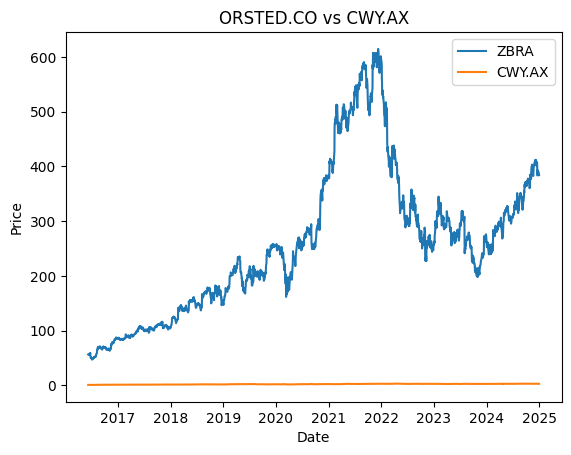

In [ ]:
# Plot ORSTED.CO and CWY.AX
plt.plot(df['ZBRA'], label='ZBRA')
plt.plot(df['CWY.AX'], label='CWY.AX')
plt.title('ORSTED.CO vs CWY.AX')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()

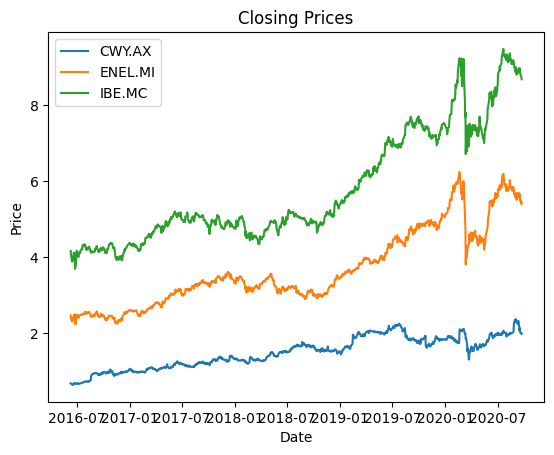

In [ ]:
# Plot columns CWY.AX, ENEL.MI, and IBE.MC
plt.plot(df_train['CWY.AX'], label='CWY.AX')
plt.plot(df_train['ENEL.MI'], label='ENEL.MI')
plt.plot(df_train['IBE.MC'], label='IBE.MC')
plt.title('Closing Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

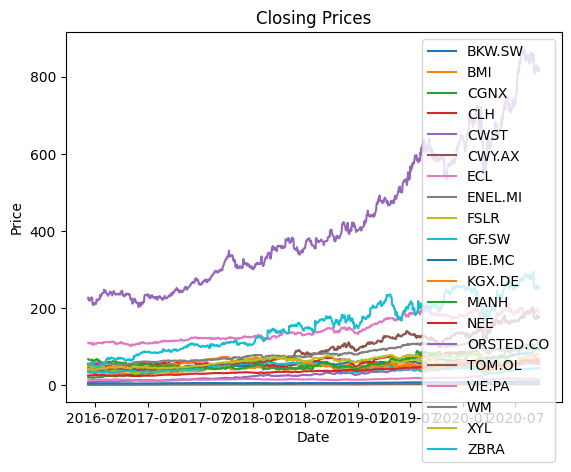

In [ ]:
# Plot all stocks
plt.plot(df_train)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(df_train.columns)
plt.show()

# Performance of test data

In [ ]:
# Create a dataframe for the fixed weighting of the same size as df_test
df_fixed_weighting = df_test.copy()
# Fill the dataframe with the fixed weighting from df_train_mini
for day in range(len(df_fixed_weighting)):
    df_fixed_weighting.iloc[day] = df_train_mini['Volatility Weighting'].values

df_fixed_weighting

Ticker,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,FSLR,GF.SW,IBE.MC,KGX.DE,MANH,NEE,ORSTED.CO,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,
2020-09-23,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2020-09-24,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2020-09-25,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2020-09-28,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2020-09-29,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2024-12-20,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194
2024-12-23,0.015927,0.013432,0.011991,0.009822,0.017671,0.401798,0.005361,0.212372,0.009385,0.019614,0.152843,0.012187,0.00884,0.019792,0.001787,0.005853,0.054632,0.011897,0.011601,0.003194


In [ ]:
# Created weighted index
df_fixed_weighted_index = (df_test * df_fixed_weighting).sum(axis=1)
df_fixed_weighted_index

Date
2020-09-23    19.378047
2020-09-24    19.322633
2020-09-25    19.542108
2020-09-28    19.774647
2020-09-29    19.824974
                ...    
2024-12-19    30.688635
2024-12-20    30.863065
2024-12-23    30.895511
2024-12-27    30.888727
2024-12-30    30.657590
Length: 1014, dtype: float64

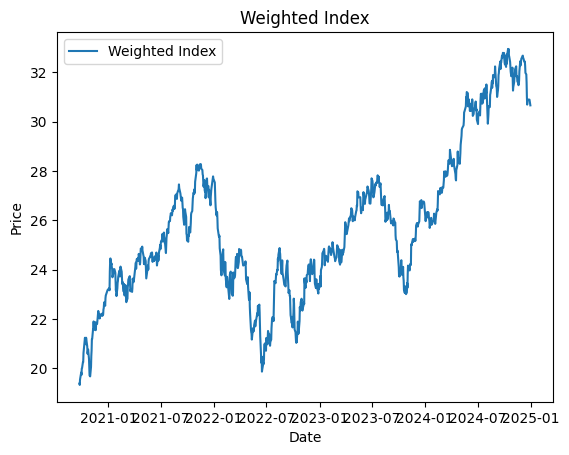

In [ ]:
# Plot weighted index
plt.plot(df_fixed_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()


In [ ]:
# Compare with SMI, S&P 500, and DJIA
smi = yf.download('^SSMI', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
smi = smi.reindex(df_fixed_weighted_index.index, method='ffill')
sp500 = yf.download('^GSPC', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
sp500 = sp500.reindex(df_fixed_weighted_index.index, method='ffill')
djia = yf.download('^DJI', start=df_weighted_index.index[0], end=df_weighted_index.index[-1], interval='1d')['Close']
djia = djia.reindex(df_fixed_weighted_index.index, method='ffill')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


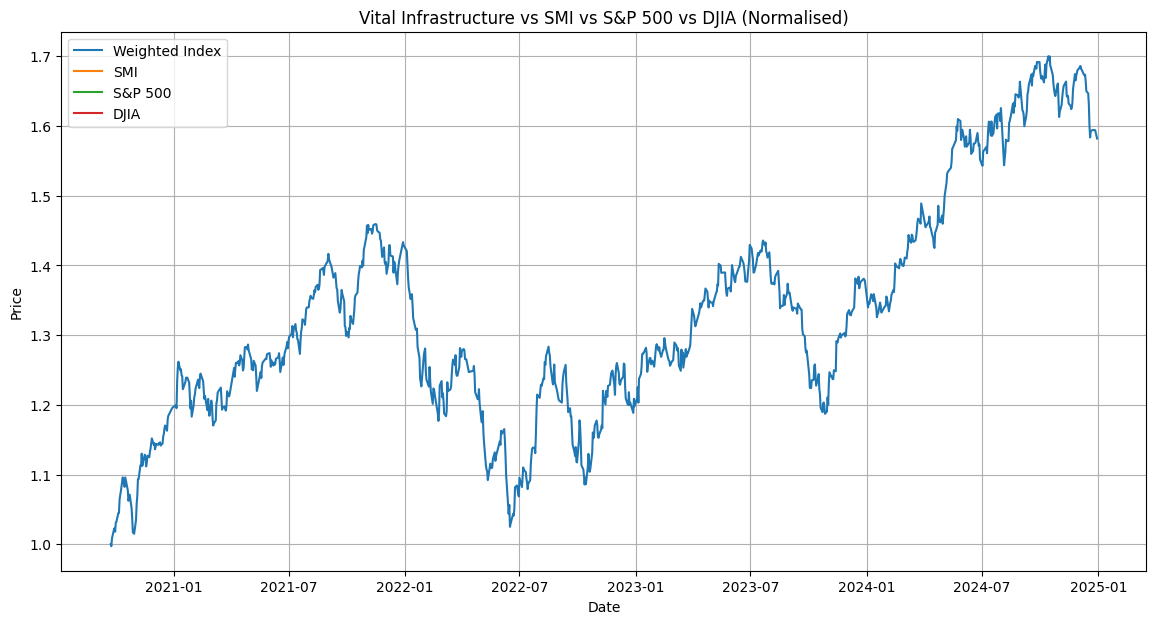

In [ ]:
# Normalize to start at 1
smi = (smi / smi.iloc[0])  # Normalize to start at 1
sp500 = (sp500 / sp500.iloc[0])  # Normalize to start at 1
djia = (djia / djia.iloc[0])  # Normalize to start at 1
df_fixed_weighted_index = (df_fixed_weighted_index / df_fixed_weighted_index.iloc[0])  # Normalize to start at 1

# Plot weighted index, SMI, S&P 500, and DJIA
plt.figure(figsize=(14, 7))
plt.plot(df_fixed_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.plot(sp500, label='S&P 500')
plt.plot(djia, label='DJIA')
plt.title('Vital Infrastructure vs SMI vs S&P 500 vs DJIA (Normalised)')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

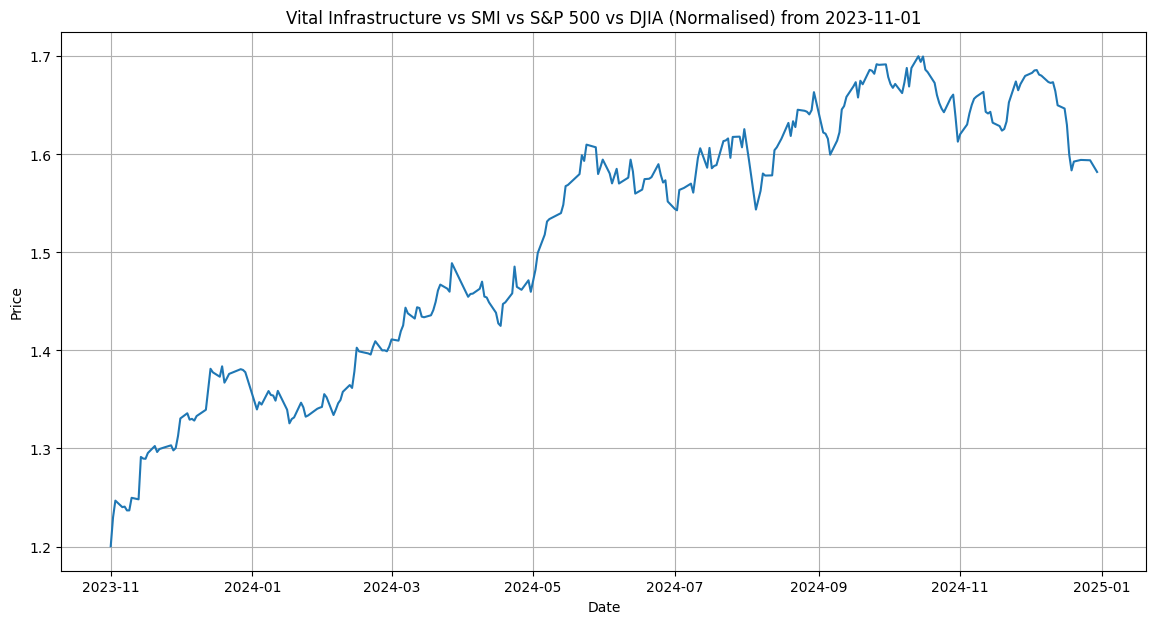

In [ ]:
# Show from 2023-11-01 till end
plt.figure(figsize=(14, 7))
plt.plot(df_fixed_weighted_index.loc['2023-11-01':], label='Weighted Index')
plt.plot(smi.loc['2023-11-01':], label='SMI')
plt.plot(sp500.loc['2023-11-01':], label='S&P 500')
plt.plot(djia.loc['2023-11-01':], label='DJIA')
plt.title('Vital Infrastructure vs SMI vs S&P 500 vs DJIA (Normalised) from 2023-11-01')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)

In [ ]:
# Empty numpy array
df_array = np.empty((5))
df_array

array([ 1. ,  2. ,  2.5,  5. , 10. ])